In [1]:
yolo_log = '/home/saikiran/HBRS/RD/training_logs/yolo_train_log.txt'

In [14]:
ssd_log = '/home/saikiran/HBRS/RD/training_logs/ssd_train_log.txt'

In [32]:
training_loss_ssd = []
itern_ssd = []
with open(ssd_log, 'r') as ssd_train:
    for each_line in ssd_train:
        if 'loss' in each_line and 'Iteration' in each_line:
            #print each_line.split(',')
            itern, loss = each_line.split(',')
            #print itern, loss
            training_loss_ssd.append(loss.split(' ')[-1])
            itern_ssd.append(itern.split(' ')[-1])

In [33]:
print len(training_loss_ssd)

4734


In [34]:
print itern_ssd[-1]

47330


In [21]:
itern , loss = test.split(',')

In [23]:
loss.split(' ')[-1]

'21.4937'

In [25]:
itern.split(' ')[-1]

'0'

In [2]:
training_loss = []
with open(yolo_log, 'r') as yolo_train:
    for each_line in yolo_train:
        if 'avg' in each_line:
            loss_term = each_line.split(',')[1]
            training_loss.append(float(loss_term.split()[0]))

In [3]:
print len(training_loss)

8430


In [35]:
training_loss = [training_loss[x] for x in xrange(len(training_loss)) if x % 2 == 0]

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

In [41]:
import numpy as np
import matplotlib.ticker as ticker
plt.rcParams["figure.figsize"] = (8,5)

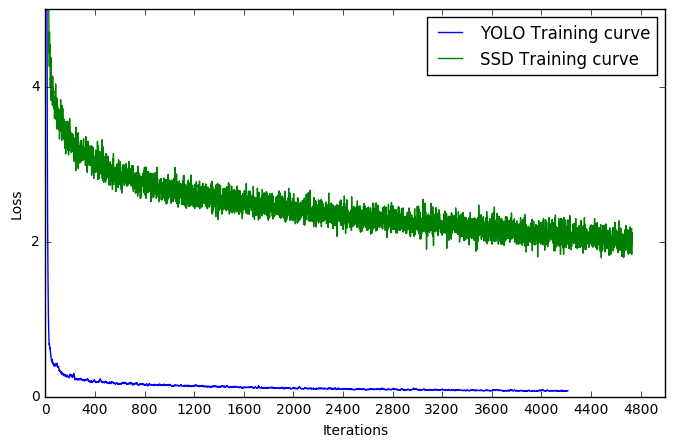

In [44]:
tick_spacing = 400
tick_yspacing = 2
fig, ax = plt.subplots(1,1)
ax.plot(xrange(len(training_loss)),training_loss, label='YOLO Training curve' )
ax.plot(xrange(len(training_loss_ssd)), training_loss_ssd, label= 'SSD Training curve' )
ax.plot()
ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
ax.set_ylim(0,5, 0.2)
ax.yaxis.set_major_locator(ticker.MultipleLocator(tick_yspacing))
ax.legend()
ax.set_xlabel('Iterations')
ax.set_ylabel('Loss')
#plt.legend('asdsasd', loc = 'upper left', prop={'size':6})
plt.show()
fig.savefig('Training_curves.png', bbox_inches='tight')
